In [1]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torchvision import transforms as T
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from torchvision.datasets import CIFAR10

In [4]:
train_transform = T.Compose([
    T.RandomCrop((32, 32), padding=4),
    T.RandomHorizontalFlip(0.5),
    T.ColorJitter(contrast=0.25),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])
val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])

train_dataset = CIFAR10("./data/", download=True, train=True, transform=train_transform)
val_dataset = CIFAR10("./data/", download=True, train=False, transform=val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=100)
# test_dataloader = DataLoader(test_dataset, batch_size=32)

In [6]:
from src.utils import set_random_seed

In [7]:
from src.utils import train, predict

In [12]:
set_random_seed(12345)
model = nn.Sequential(
    nn.Sequential(
        nn.Conv2d(3, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(64, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(64, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Flatten(),
        nn.Linear(8192, 1536),
        nn.BatchNorm1d(1536),
        nn.ReLU(),
        nn.Linear(1536, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
criterion = nn.CrossEntropyLoss(reduction="mean")
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.1, verbose=True)
n_epochs = 100

device = "cuda:0" if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)

Adjusting learning rate of group 0 to 1.0000e-01.


In [13]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.to("cpu"), true_labels.to("cpu"))
print("tests passed")

tests passed


  0%|          | 0/500 [00:00<?, ?it/s]

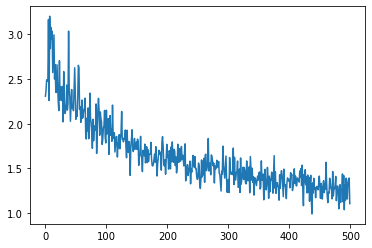

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 0, Train loss: 1.6431219581365586, Validation loss: 1.4493807554244995, Validation accuracy: 0.4772


  0%|          | 0/500 [00:00<?, ?it/s]

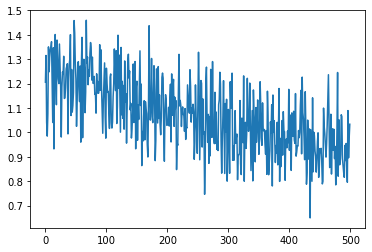

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 1, Train loss: 1.0717552123069762, Validation loss: 1.0978729724884033, Validation accuracy: 0.6179


  0%|          | 0/500 [00:00<?, ?it/s]

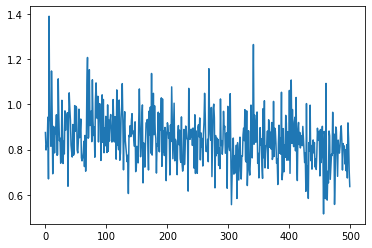

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 2, Train loss: 0.8445422792434693, Validation loss: 0.7338503003120422, Validation accuracy: 0.7441


  0%|          | 0/500 [00:00<?, ?it/s]

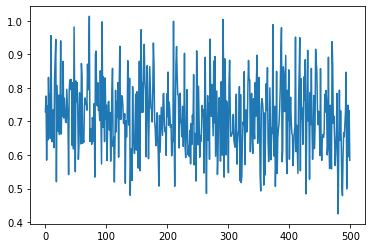

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 3, Train loss: 0.7143592144846916, Validation loss: 0.7096594572067261, Validation accuracy: 0.7563


  0%|          | 0/500 [00:00<?, ?it/s]

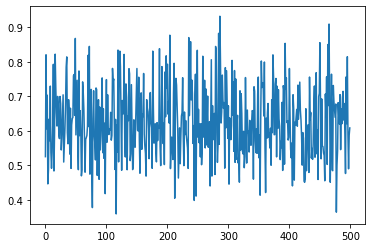

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 4, Train loss: 0.6259704841375351, Validation loss: 0.6309012770652771, Validation accuracy: 0.7763


  0%|          | 0/500 [00:00<?, ?it/s]

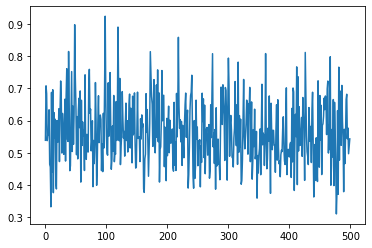

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 5, Train loss: 0.5651696963906289, Validation loss: 0.5826506018638611, Validation accuracy: 0.7994


  0%|          | 0/500 [00:00<?, ?it/s]

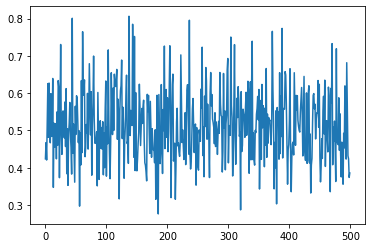

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 6, Train loss: 0.5138549925684929, Validation loss: 0.49070078134536743, Validation accuracy: 0.8291


  0%|          | 0/500 [00:00<?, ?it/s]

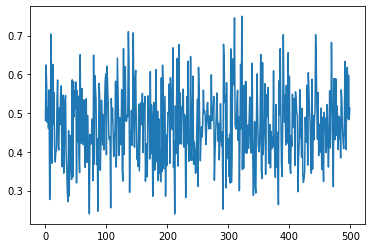

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 7, Train loss: 0.46744066148996355, Validation loss: 0.5459442734718323, Validation accuracy: 0.817


  0%|          | 0/500 [00:00<?, ?it/s]

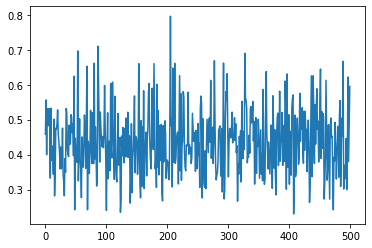

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 8, Train loss: 0.43762853598594664, Validation loss: 0.4863044321537018, Validation accuracy: 0.8377


  0%|          | 0/500 [00:00<?, ?it/s]

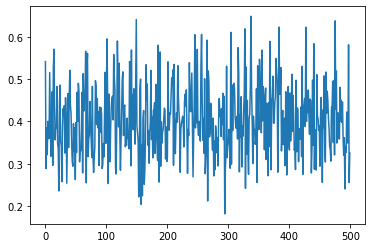

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9, Train loss: 0.40350757986307145, Validation loss: 0.45441341400146484, Validation accuracy: 0.8481


  0%|          | 0/500 [00:00<?, ?it/s]

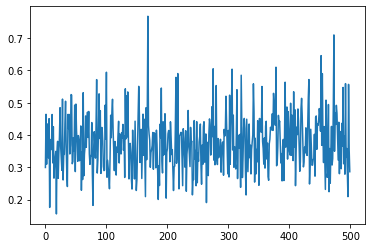

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10, Train loss: 0.37746412986516953, Validation loss: 0.45996126532554626, Validation accuracy: 0.8482


  0%|          | 0/500 [00:00<?, ?it/s]

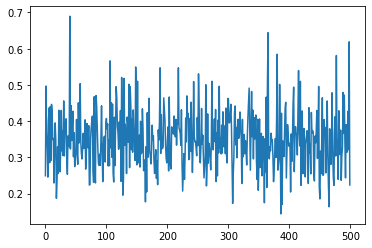

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11, Train loss: 0.3498813327252865, Validation loss: 0.4218701124191284, Validation accuracy: 0.8572


  0%|          | 0/500 [00:00<?, ?it/s]

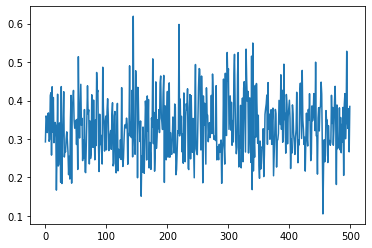

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12, Train loss: 0.33086992006003857, Validation loss: 0.4029107093811035, Validation accuracy: 0.8642


  0%|          | 0/500 [00:00<?, ?it/s]

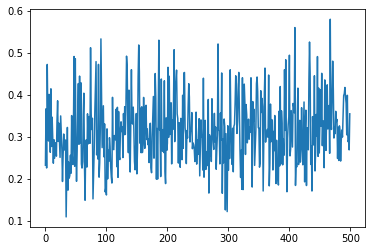

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13, Train loss: 0.3146155019700527, Validation loss: 0.41174209117889404, Validation accuracy: 0.8646


  0%|          | 0/500 [00:00<?, ?it/s]

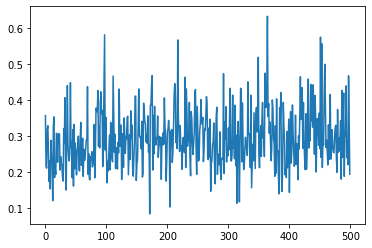

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14, Train loss: 0.29292646622657775, Validation loss: 0.41294774413108826, Validation accuracy: 0.863


  0%|          | 0/500 [00:00<?, ?it/s]

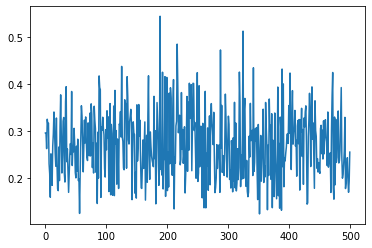

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15, Train loss: 0.270336765781045, Validation loss: 0.4347591698169708, Validation accuracy: 0.8589


  0%|          | 0/500 [00:00<?, ?it/s]

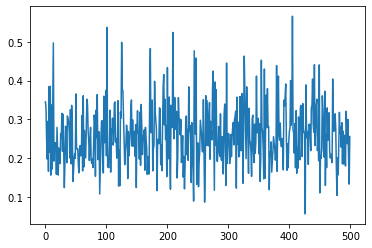

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16, Train loss: 0.2590657184496522, Validation loss: 0.4060708284378052, Validation accuracy: 0.8715


  0%|          | 0/500 [00:00<?, ?it/s]

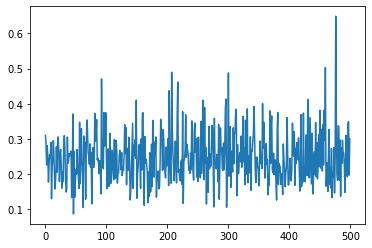

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 17, Train loss: 0.24732290554046632, Validation loss: 0.4057482182979584, Validation accuracy: 0.8708


  0%|          | 0/500 [00:00<?, ?it/s]

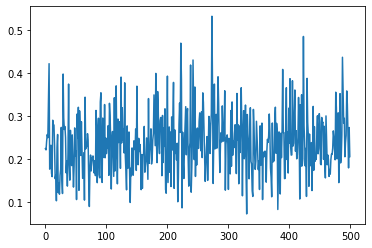

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 18, Train loss: 0.23627443404495715, Validation loss: 0.37384340167045593, Validation accuracy: 0.8796


  0%|          | 0/500 [00:00<?, ?it/s]

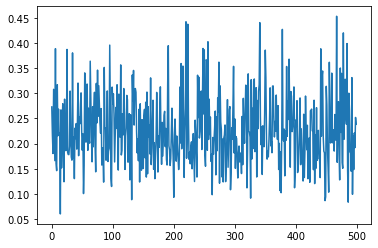

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 19, Train loss: 0.22745162290334703, Validation loss: 0.36151209473609924, Validation accuracy: 0.8822


  0%|          | 0/500 [00:00<?, ?it/s]

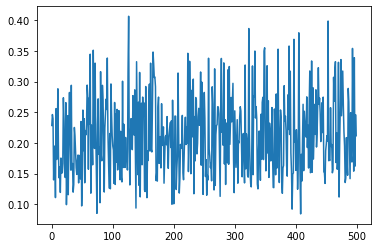

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 20, Train loss: 0.21195952594280243, Validation loss: 0.3614731729030609, Validation accuracy: 0.8904


  0%|          | 0/500 [00:00<?, ?it/s]

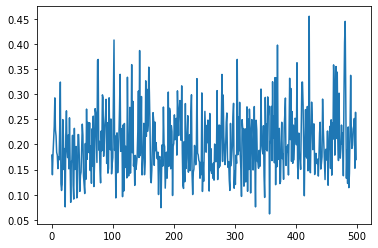

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 21, Train loss: 0.20336365512013435, Validation loss: 0.355223149061203, Validation accuracy: 0.8887


  0%|          | 0/500 [00:00<?, ?it/s]

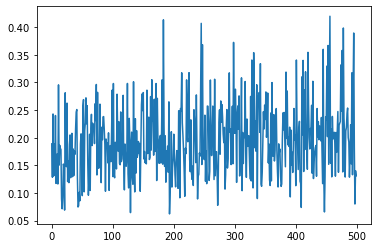

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 22, Train loss: 0.1953532826602459, Validation loss: 0.3738252818584442, Validation accuracy: 0.8821


  0%|          | 0/500 [00:00<?, ?it/s]

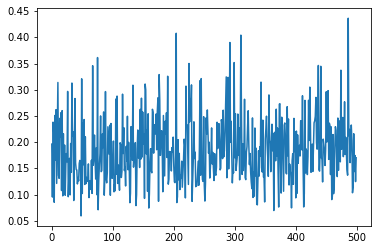

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 23, Train loss: 0.18538969510048628, Validation loss: 0.38390424847602844, Validation accuracy: 0.8841


  0%|          | 0/500 [00:00<?, ?it/s]

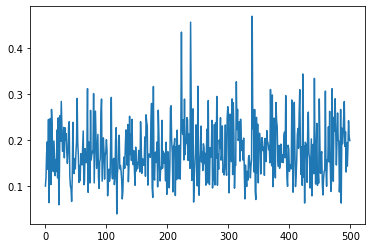

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 24, Train loss: 0.1752061829343438, Validation loss: 0.38031095266342163, Validation accuracy: 0.8869


  0%|          | 0/500 [00:00<?, ?it/s]

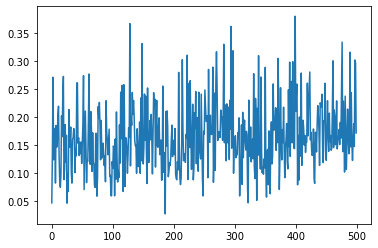

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 25, Train loss: 0.16550759216398, Validation loss: 0.3739175498485565, Validation accuracy: 0.8928


  0%|          | 0/500 [00:00<?, ?it/s]

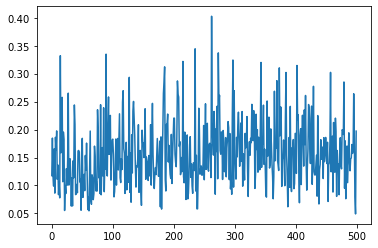

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 26, Train loss: 0.15786110142618417, Validation loss: 0.40003645420074463, Validation accuracy: 0.8879


  0%|          | 0/500 [00:00<?, ?it/s]

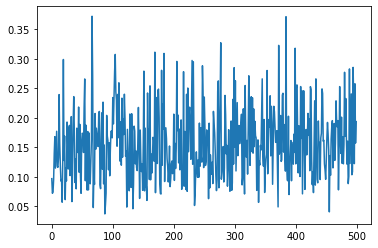

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 27, Train loss: 0.1573896200209856, Validation loss: 0.39063069224357605, Validation accuracy: 0.8819


  0%|          | 0/500 [00:00<?, ?it/s]

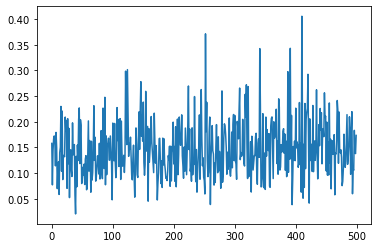

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 28, Train loss: 0.14691182033345104, Validation loss: 0.4152202606201172, Validation accuracy: 0.8819


  0%|          | 0/500 [00:00<?, ?it/s]

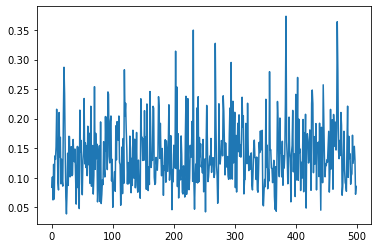

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 29, Train loss: 0.1389356104657054, Validation loss: 0.3936537206172943, Validation accuracy: 0.8893


  0%|          | 0/500 [00:00<?, ?it/s]

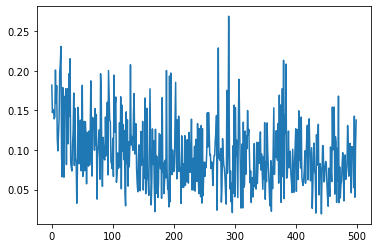

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 30, Train loss: 0.09637944559380413, Validation loss: 0.33058080077171326, Validation accuracy: 0.9076


  0%|          | 0/500 [00:00<?, ?it/s]

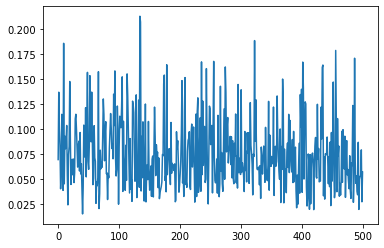

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 31, Train loss: 0.0752879256401211, Validation loss: 0.32977110147476196, Validation accuracy: 0.9088


  0%|          | 0/500 [00:00<?, ?it/s]

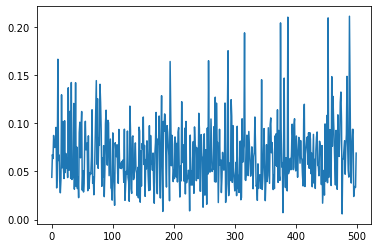

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 32, Train loss: 0.06645037177111954, Validation loss: 0.33809977769851685, Validation accuracy: 0.9098


  0%|          | 0/500 [00:00<?, ?it/s]

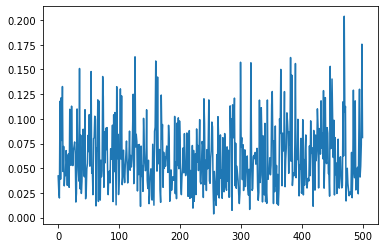

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 33, Train loss: 0.06123090113420039, Validation loss: 0.3396361172199249, Validation accuracy: 0.9101


  0%|          | 0/500 [00:00<?, ?it/s]

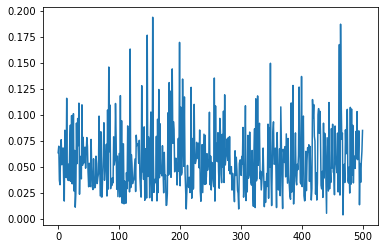

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 34, Train loss: 0.057233942272141576, Validation loss: 0.33938658237457275, Validation accuracy: 0.9105


  0%|          | 0/500 [00:00<?, ?it/s]

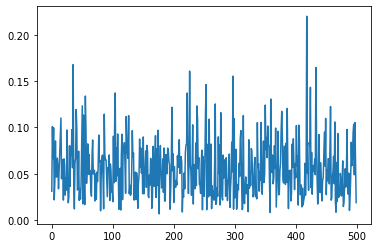

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 35, Train loss: 0.05600955832283944, Validation loss: 0.33815085887908936, Validation accuracy: 0.9114


  0%|          | 0/500 [00:00<?, ?it/s]

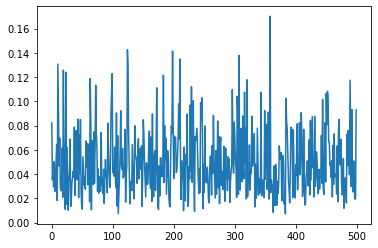

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 36, Train loss: 0.04956691552978009, Validation loss: 0.34737545251846313, Validation accuracy: 0.9115


  0%|          | 0/500 [00:00<?, ?it/s]

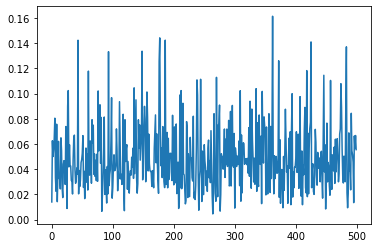

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 37, Train loss: 0.04877462637238204, Validation loss: 0.35408541560173035, Validation accuracy: 0.9107


  0%|          | 0/500 [00:00<?, ?it/s]

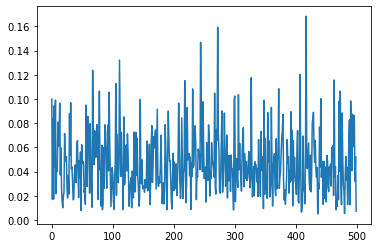

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 38, Train loss: 0.04659443188458681, Validation loss: 0.35604530572891235, Validation accuracy: 0.9115


  0%|          | 0/500 [00:00<?, ?it/s]

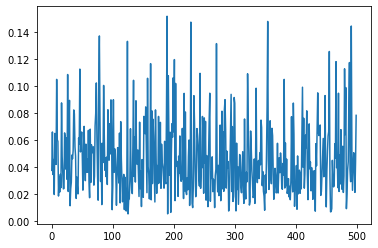

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 39, Train loss: 0.04608920048270375, Validation loss: 0.35702571272850037, Validation accuracy: 0.9105


  0%|          | 0/500 [00:00<?, ?it/s]

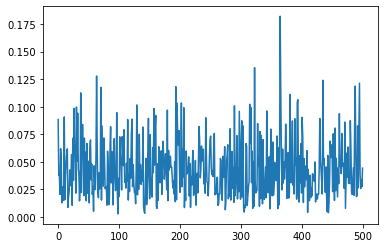

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 40, Train loss: 0.04390690907323733, Validation loss: 0.3656298518180847, Validation accuracy: 0.9107


  0%|          | 0/500 [00:00<?, ?it/s]

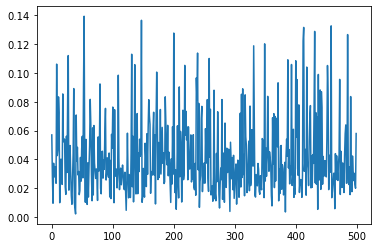

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 41, Train loss: 0.041580094870645554, Validation loss: 0.36352670192718506, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

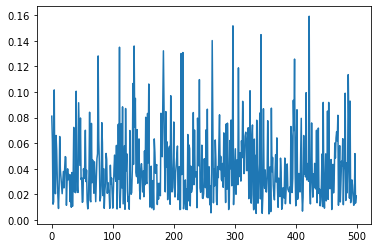

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 42, Train loss: 0.04074227747693658, Validation loss: 0.3644513189792633, Validation accuracy: 0.9101


  0%|          | 0/500 [00:00<?, ?it/s]

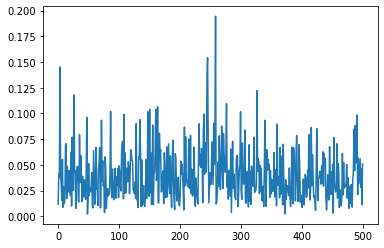

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 43, Train loss: 0.03958654181286693, Validation loss: 0.36924946308135986, Validation accuracy: 0.9125


  0%|          | 0/500 [00:00<?, ?it/s]

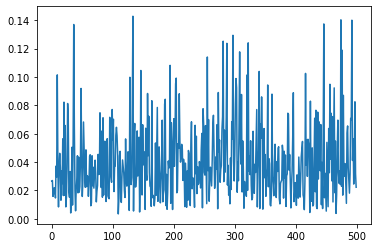

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 44, Train loss: 0.04031389994453639, Validation loss: 0.36874398589134216, Validation accuracy: 0.9123


  0%|          | 0/500 [00:00<?, ?it/s]

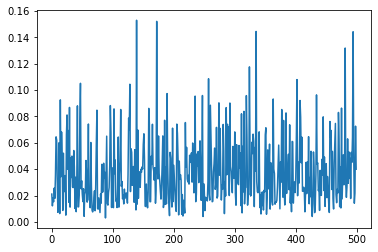

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 45, Train loss: 0.03762761497218162, Validation loss: 0.3699338734149933, Validation accuracy: 0.9116


  0%|          | 0/500 [00:00<?, ?it/s]

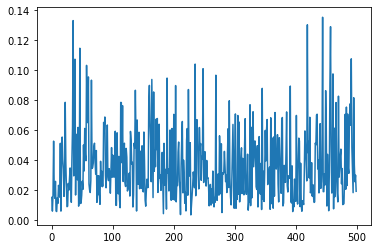

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 46, Train loss: 0.03621024182252586, Validation loss: 0.3725922405719757, Validation accuracy: 0.913


  0%|          | 0/500 [00:00<?, ?it/s]

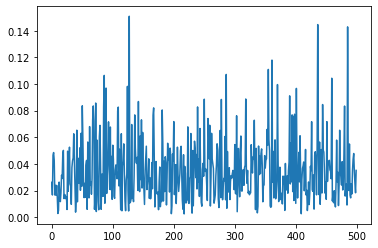

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 47, Train loss: 0.03492965081427246, Validation loss: 0.37865397334098816, Validation accuracy: 0.912


  0%|          | 0/500 [00:00<?, ?it/s]

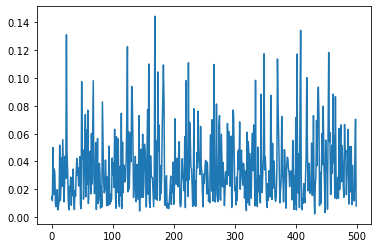

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 48, Train loss: 0.03489907802408561, Validation loss: 0.38403770327568054, Validation accuracy: 0.9105


  0%|          | 0/500 [00:00<?, ?it/s]

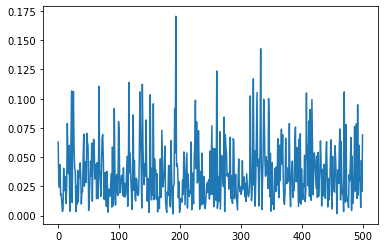

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 49, Train loss: 0.03614105338975787, Validation loss: 0.3795107305049896, Validation accuracy: 0.9116


  0%|          | 0/500 [00:00<?, ?it/s]

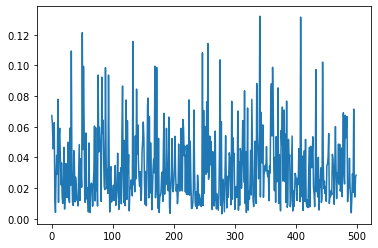

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 50, Train loss: 0.032972131378483024, Validation loss: 0.38672932982444763, Validation accuracy: 0.9109


  0%|          | 0/500 [00:00<?, ?it/s]

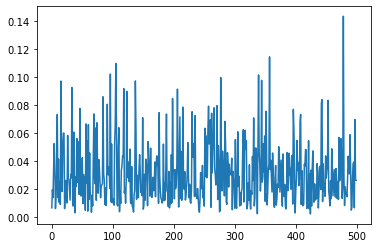

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 51, Train loss: 0.03140829949919134, Validation loss: 0.39023303985595703, Validation accuracy: 0.9108


  0%|          | 0/500 [00:00<?, ?it/s]

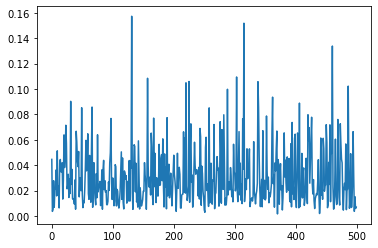

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 52, Train loss: 0.03108533405419439, Validation loss: 0.39283427596092224, Validation accuracy: 0.9116


  0%|          | 0/500 [00:00<?, ?it/s]

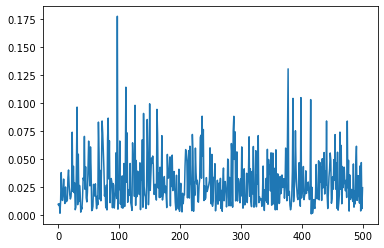

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 53, Train loss: 0.030123346994398163, Validation loss: 0.3963766396045685, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

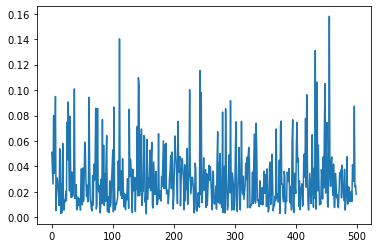

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 54, Train loss: 0.030124018486589195, Validation loss: 0.397455632686615, Validation accuracy: 0.9113


  0%|          | 0/500 [00:00<?, ?it/s]

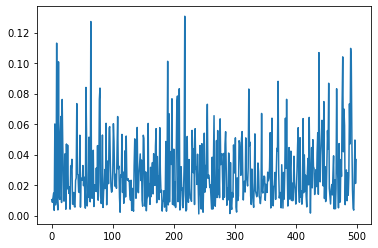

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 55, Train loss: 0.028426507661119104, Validation loss: 0.39828574657440186, Validation accuracy: 0.911


  0%|          | 0/500 [00:00<?, ?it/s]

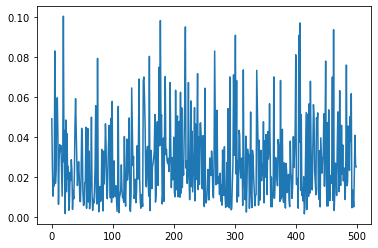

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 56, Train loss: 0.02726504801423289, Validation loss: 0.4046264886856079, Validation accuracy: 0.912


  0%|          | 0/500 [00:00<?, ?it/s]

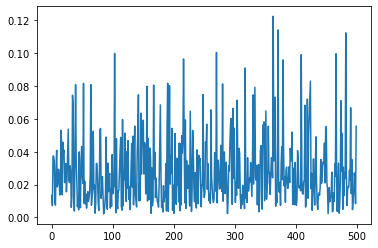

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 57, Train loss: 0.027808862518053503, Validation loss: 0.4036054313182831, Validation accuracy: 0.9106


  0%|          | 0/500 [00:00<?, ?it/s]

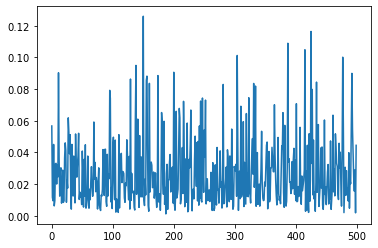

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 58, Train loss: 0.027073803097009658, Validation loss: 0.4018309414386749, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

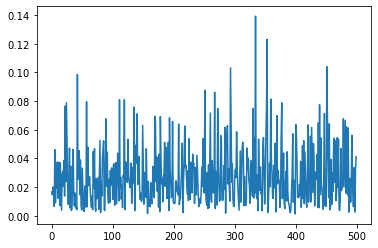

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 59, Train loss: 0.027713793948525564, Validation loss: 0.4076366126537323, Validation accuracy: 0.9115


  0%|          | 0/500 [00:00<?, ?it/s]

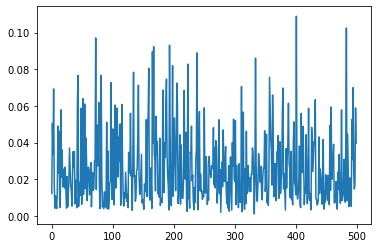

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 60, Train loss: 0.025638353140559046, Validation loss: 0.40873435139656067, Validation accuracy: 0.9113


  0%|          | 0/500 [00:00<?, ?it/s]

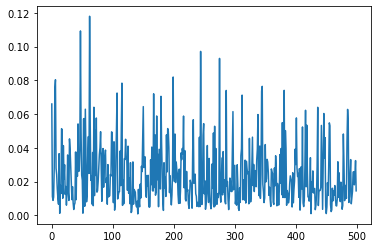

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 61, Train loss: 0.024105314156622627, Validation loss: 0.40635183453559875, Validation accuracy: 0.9113


  0%|          | 0/500 [00:00<?, ?it/s]

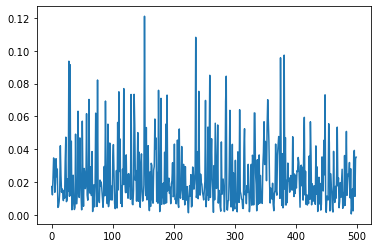

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 62, Train loss: 0.023297044254024513, Validation loss: 0.4075087904930115, Validation accuracy: 0.9109


  0%|          | 0/500 [00:00<?, ?it/s]

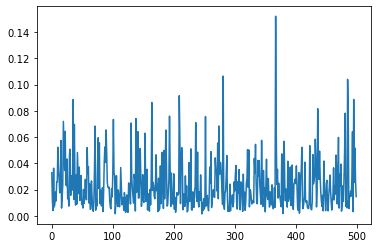

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 63, Train loss: 0.023409942931728437, Validation loss: 0.4074367880821228, Validation accuracy: 0.9117


  0%|          | 0/500 [00:00<?, ?it/s]

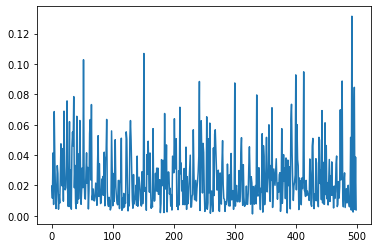

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 64, Train loss: 0.02426689342246391, Validation loss: 0.40616777539253235, Validation accuracy: 0.9112


  0%|          | 0/500 [00:00<?, ?it/s]

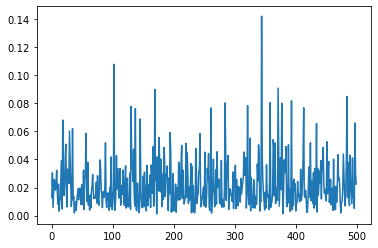

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 65, Train loss: 0.02218497096048668, Validation loss: 0.40484896302223206, Validation accuracy: 0.9118


  0%|          | 0/500 [00:00<?, ?it/s]

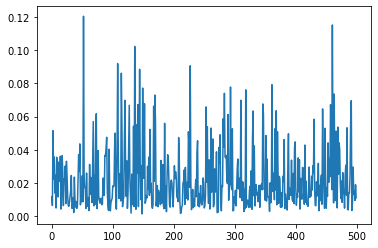

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 66, Train loss: 0.022373303856002166, Validation loss: 0.4069380760192871, Validation accuracy: 0.9123


  0%|          | 0/500 [00:00<?, ?it/s]

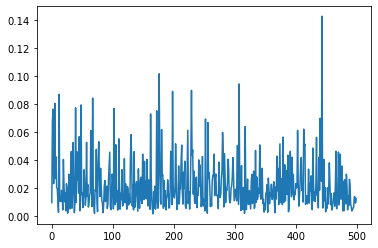

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 67, Train loss: 0.02198429484385997, Validation loss: 0.40595927834510803, Validation accuracy: 0.9124


  0%|          | 0/500 [00:00<?, ?it/s]

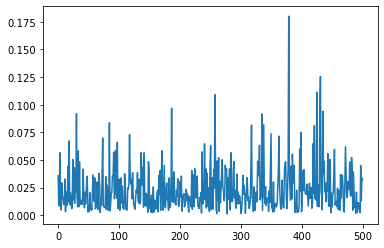

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 68, Train loss: 0.023356421538395806, Validation loss: 0.4091336727142334, Validation accuracy: 0.9112


  0%|          | 0/500 [00:00<?, ?it/s]

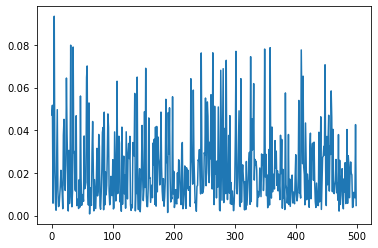

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 69, Train loss: 0.021610224267700685, Validation loss: 0.40395426750183105, Validation accuracy: 0.9127


  0%|          | 0/500 [00:00<?, ?it/s]

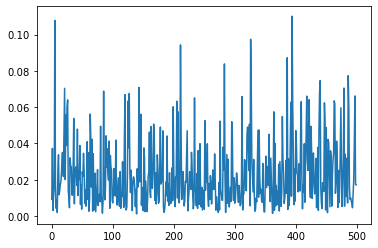

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 70, Train loss: 0.022912688278825952, Validation loss: 0.4042927920818329, Validation accuracy: 0.9109


  0%|          | 0/500 [00:00<?, ?it/s]

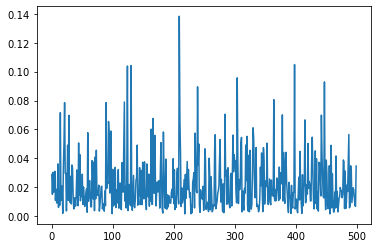

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 71, Train loss: 0.022069233360001817, Validation loss: 0.40483957529067993, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

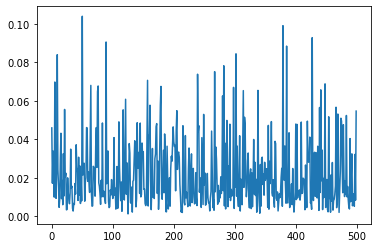

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 72, Train loss: 0.021919845358701423, Validation loss: 0.4062221348285675, Validation accuracy: 0.9114


  0%|          | 0/500 [00:00<?, ?it/s]

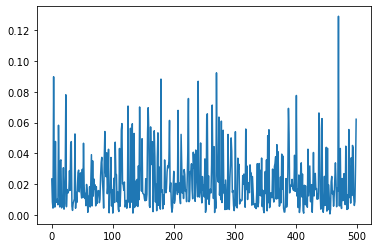

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 73, Train loss: 0.02157945316529367, Validation loss: 0.40606099367141724, Validation accuracy: 0.9125


  0%|          | 0/500 [00:00<?, ?it/s]

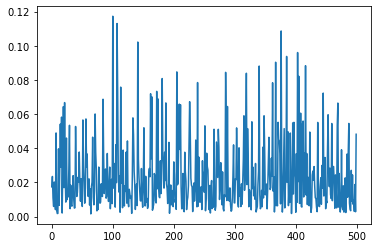

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 74, Train loss: 0.023571822211612015, Validation loss: 0.4085363447666168, Validation accuracy: 0.9117


  0%|          | 0/500 [00:00<?, ?it/s]

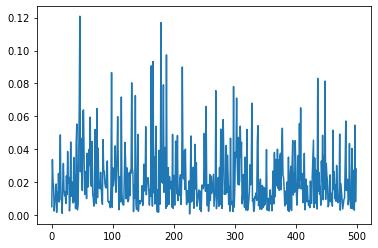

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 75, Train loss: 0.021691420006682165, Validation loss: 0.4101000726222992, Validation accuracy: 0.9116


  0%|          | 0/500 [00:00<?, ?it/s]

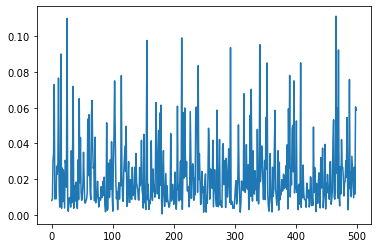

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 76, Train loss: 0.02190315807890147, Validation loss: 0.40848079323768616, Validation accuracy: 0.9128


  0%|          | 0/500 [00:00<?, ?it/s]

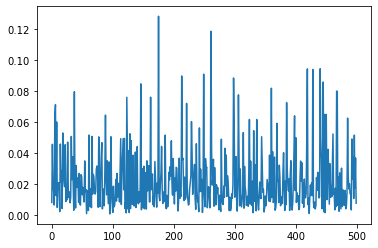

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 77, Train loss: 0.022089593209093438, Validation loss: 0.40943843126296997, Validation accuracy: 0.9129


  0%|          | 0/500 [00:00<?, ?it/s]

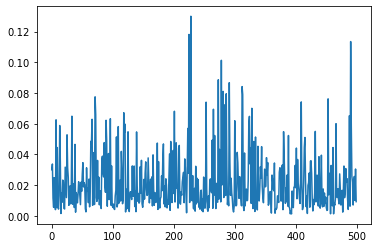

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 78, Train loss: 0.022020071713719516, Validation loss: 0.4084082841873169, Validation accuracy: 0.9133


  0%|          | 0/500 [00:00<?, ?it/s]

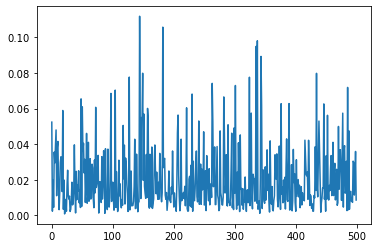

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 79, Train loss: 0.0202536251853453, Validation loss: 0.4083312451839447, Validation accuracy: 0.9116


  0%|          | 0/500 [00:00<?, ?it/s]

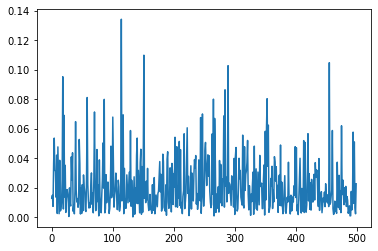

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 80, Train loss: 0.02137790495553054, Validation loss: 0.41156005859375, Validation accuracy: 0.913


  0%|          | 0/500 [00:00<?, ?it/s]

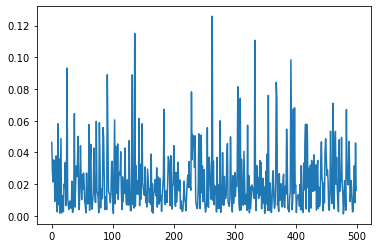

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 81, Train loss: 0.021485346158966422, Validation loss: 0.4085763692855835, Validation accuracy: 0.9131


  0%|          | 0/500 [00:00<?, ?it/s]

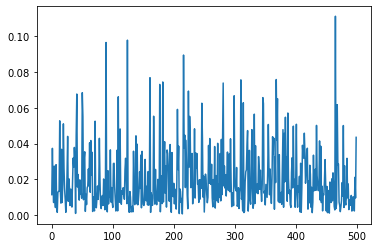

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 82, Train loss: 0.020208953683264554, Validation loss: 0.4093807339668274, Validation accuracy: 0.9117


  0%|          | 0/500 [00:00<?, ?it/s]

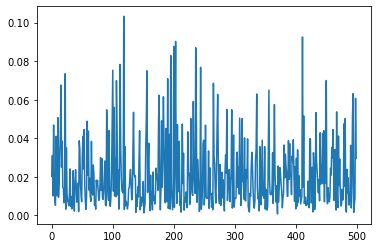

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 83, Train loss: 0.02092964887688868, Validation loss: 0.40559402108192444, Validation accuracy: 0.9121


  0%|          | 0/500 [00:00<?, ?it/s]

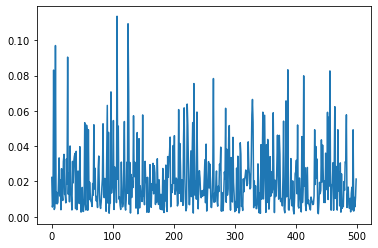

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 84, Train loss: 0.020971476531820372, Validation loss: 0.4083285927772522, Validation accuracy: 0.9129


  0%|          | 0/500 [00:00<?, ?it/s]

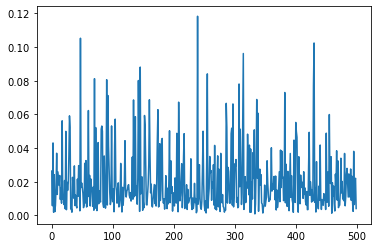

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 85, Train loss: 0.019915085383574477, Validation loss: 0.41003161668777466, Validation accuracy: 0.9117


  0%|          | 0/500 [00:00<?, ?it/s]

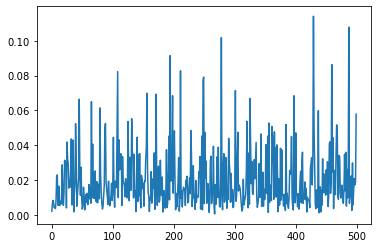

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 86, Train loss: 0.019979779626242818, Validation loss: 0.4102570116519928, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

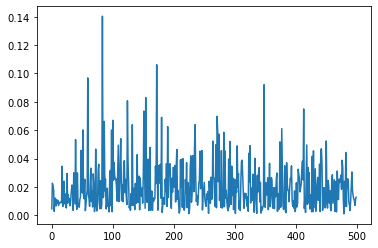

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 87, Train loss: 0.020056152060162275, Validation loss: 0.41180726885795593, Validation accuracy: 0.9118


  0%|          | 0/500 [00:00<?, ?it/s]

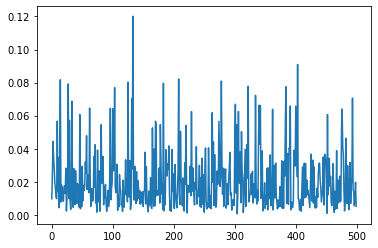

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 88, Train loss: 0.020877457477501592, Validation loss: 0.4102078080177307, Validation accuracy: 0.912


  0%|          | 0/500 [00:00<?, ?it/s]

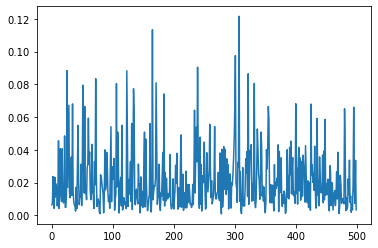

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 89, Train loss: 0.021582178725046107, Validation loss: 0.4109610319137573, Validation accuracy: 0.9129


  0%|          | 0/500 [00:00<?, ?it/s]

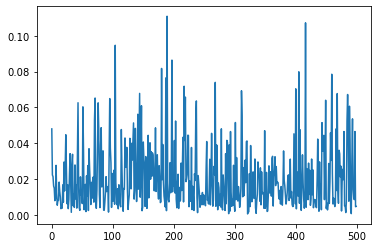

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 90, Train loss: 0.02078883741388563, Validation loss: 0.4132145941257477, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

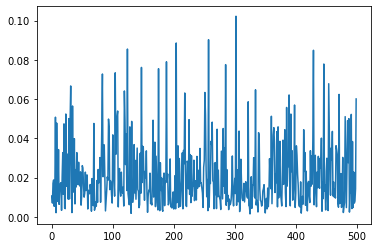

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 91, Train loss: 0.02099252199451439, Validation loss: 0.4129524827003479, Validation accuracy: 0.9117


  0%|          | 0/500 [00:00<?, ?it/s]

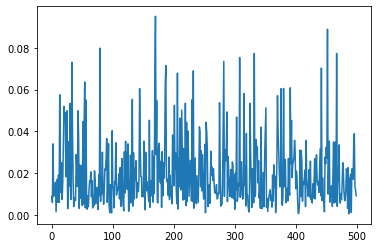

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 92, Train loss: 0.01993155885708984, Validation loss: 0.40659990906715393, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

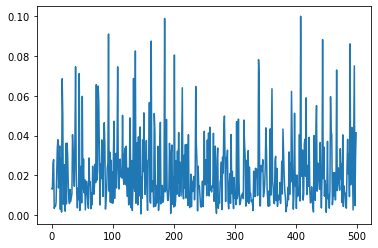

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 93, Train loss: 0.021271849326440134, Validation loss: 0.4073895215988159, Validation accuracy: 0.9119


  0%|          | 0/500 [00:00<?, ?it/s]

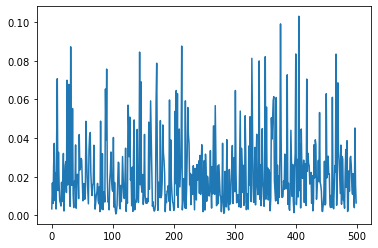

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 94, Train loss: 0.021663899187697098, Validation loss: 0.4163053035736084, Validation accuracy: 0.9124


  0%|          | 0/500 [00:00<?, ?it/s]

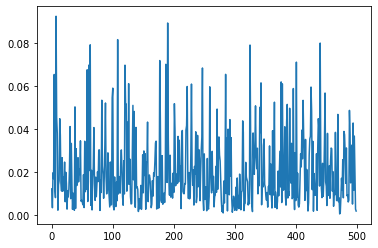

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 95, Train loss: 0.02059551808703691, Validation loss: 0.4120543301105499, Validation accuracy: 0.9125


  0%|          | 0/500 [00:00<?, ?it/s]

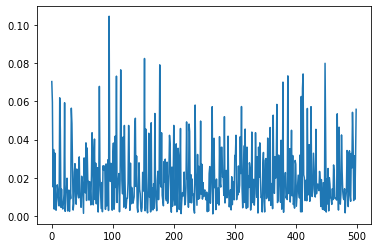

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 96, Train loss: 0.01981440231949091, Validation loss: 0.41052141785621643, Validation accuracy: 0.9125


  0%|          | 0/500 [00:00<?, ?it/s]

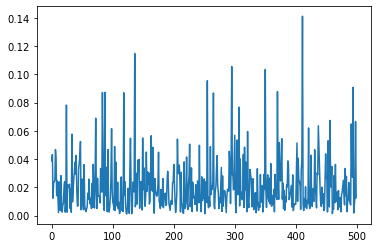

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 97, Train loss: 0.0207053705137223, Validation loss: 0.41300374269485474, Validation accuracy: 0.9132


  0%|          | 0/500 [00:00<?, ?it/s]

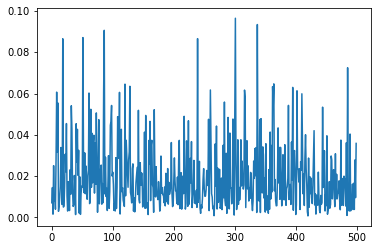

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 98, Train loss: 0.019733287538285366, Validation loss: 0.41074082255363464, Validation accuracy: 0.9123


  0%|          | 0/500 [00:00<?, ?it/s]

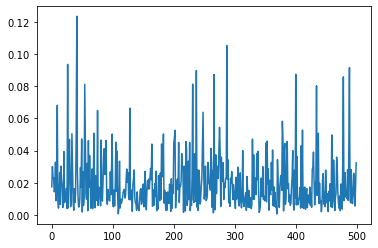

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 99, Train loss: 0.01969997231243178, Validation loss: 0.4140658974647522, Validation accuracy: 0.9112


In [14]:
accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler, plot=True)

Accuracy: 0.9112


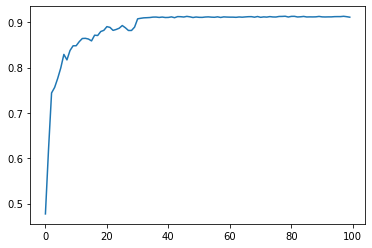

In [16]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.to("cpu"), predicted_labels.to("cpu"))
print(f"Accuracy: {accuracy}")
plt.plot(accuracies)
plt.show()